In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
path = os.getcwd()
path_datasets = path + "/datasets/"
path_img = path + "/img/"

# Height Wight

In [3]:
nombre = 'HeightWeight'

In [4]:
HeightWeight = pd.read_csv(path_datasets + nombre + '.csv', index_col=0)

In [5]:
HeightWeight.dtypes

Height(Inches)    float64
Weight(Pounds)    float64
dtype: object

In [6]:
# Transformar data a sistema internacional
HeightWeight['Altura(cm)'] = HeightWeight['Height(Inches)'] * 2.54
HeightWeight['Peso(kg)'] = HeightWeight['Weight(Pounds)'] * 0.453592
HeightWeight.drop('Height(Inches)', axis = 1, inplace=True)
HeightWeight.drop('Weight(Pounds)', axis = 1, inplace=True)
HeightWeight

,Altura(cm),Peso(kg)
Index,,
1,167.089607,51.252494
2,181.648633,61.909547
3,176.272800,69.411778
4,173.270164,64.562199
5,172.181037,65.452010
...,...,...
24996,176.535461,53.538008
24997,163.952580,54.518674
24998,164.334317,53.644285


# Experimento 1

In [7]:
media = HeightWeight['Altura(cm)'].mean()
std = HeightWeight['Altura(cm)'].std()
print(f'Media de los datos: {media}')
print(f'Desviacion estandar {std}')

Media de los datos: 172.702508535872
Desviacion estandar 4.830264078862247


In [8]:
alturas_normalizadas = pd.DataFrame()
alturas_normalizadas['Altura(cm)'] = (HeightWeight['Altura(cm)'] - media) / std

# Experimento 2

In [9]:
media = HeightWeight['Peso(kg)'].mean()
std = HeightWeight['Peso(kg)'].std()
print(f'Media de los datos: {media}')
print(f'Desviacion estandar {std}')

Media de los datos: 57.64220880316959
Desviacion estandar 5.289289847670386


In [10]:
pesos_normalizados = pd.DataFrame()
pesos_normalizados['Peso(kg)'] = (HeightWeight['Peso(kg)'] - media) / std

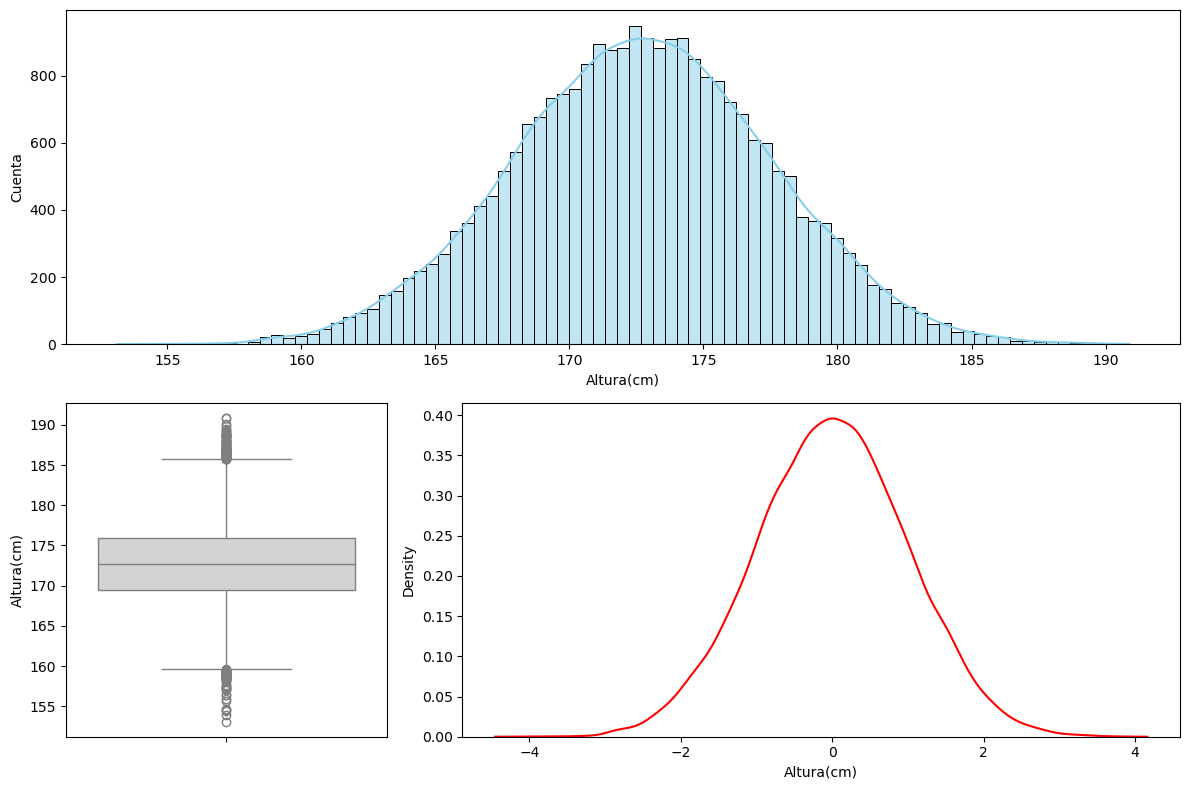

In [33]:
def get_figures(data, data_normalizada, columna, nombre = None):
    # Crear la figura y el diseño con gridspec
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 3)  # 3 filas, 3 columnas

    # Gráfico que abarca toda la primera fila
    ax1 = fig.add_subplot(gs[0, :])  # Primera fila, todas las columnas
    sns.histplot(data[columna], kde=True, ax=ax1, stat='count',color='skyblue')
    ax1.set_ylabel('Cuenta')
    #ax1.set_title('Histograma que abarca toda la fila')

    # Gráfico que ocupa las dos primeras columnas en la segunda fila
    ax2 = fig.add_subplot(gs[1, 0])  # Segunda fila, columnas 0 y 1
    sns.boxplot(data[columna], ax=ax2, color='lightgray')
    #ax2.set_title('Boxplot en dos columnas')
    #
    ax3 = fig.add_subplot(gs[1, 1:])
    sns.kdeplot(data_normalizada[columna], ax=ax3, color='red')
    
    plt.tight_layout()
    plt.show()
get_figures(HeightWeight, alturas_normalizadas, 'Altura(cm)')

/tmp/ipykernel_41647/1843453817.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='C', y='B', data=data, ax=ax2, palette='Set2')
/tmp/ipykernel_41647/1843453817.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='C', y='A', data=data, ax=ax4, palette='muted')


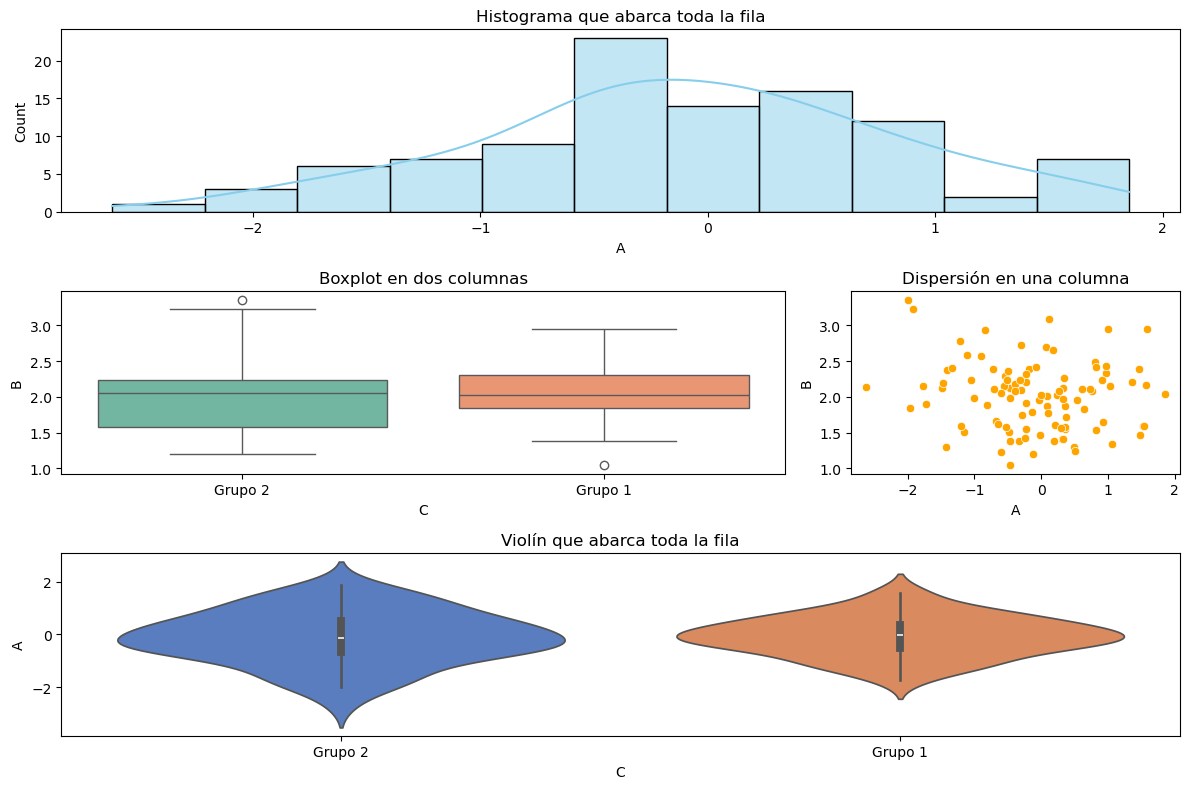

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Crear datos de ejemplo
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.normal(size=100),
    'B': np.random.normal(loc=2, scale=0.5, size=100),
    'C': np.random.choice(['Grupo 1', 'Grupo 2'], size=100)
})

# Crear la figura y el diseño con gridspec
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3, 3)  # 3 filas, 3 columnas

# Gráfico que abarca toda la primera fila
ax1 = fig.add_subplot(gs[0, :])  # Primera fila, todas las columnas
sns.histplot(data['A'], kde=True, ax=ax1, color='skyblue')
ax1.set_title('Histograma que abarca toda la fila')

# Gráfico que ocupa las dos primeras columnas en la segunda fila
ax2 = fig.add_subplot(gs[1, :2])  # Segunda fila, columnas 0 y 1
sns.boxplot(x='C', y='B', data=data, ax=ax2, palette='Set2')
ax2.set_title('Boxplot en dos columnas')

# Gráfico que ocupa la última columna en la segunda fila
ax3 = fig.add_subplot(gs[1, 2])  # Segunda fila, columna 2
sns.scatterplot(x='A', y='B', data=data, ax=ax3, color='orange')
ax3.set_title('Dispersión en una columna')

# Gráfico que ocupa toda la última fila
ax4 = fig.add_subplot(gs[2, :])  # Última fila, todas las columnas
sns.violinplot(x='C', y='A', data=data, ax=ax4, palette='muted')
ax4.set_title('Violín que abarca toda la fila')

plt.tight_layout()
plt.show()


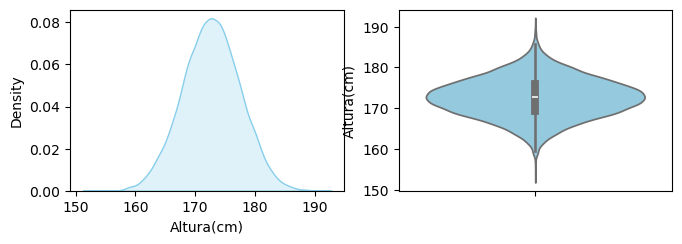

In [12]:
def get_figures(data, data_normalizada, columna, nombre = None):
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(3, 3)
    colores = ['skyblue', 'lightgreen']


    ax1 = fig.add_subplot(gs[0,0])
    sns.kdeplot(data[columna], ax=ax1, fill = True, color=colores[0])
    #axes[0,0].set_title('Grafico de densidad')
    #axes[0,0].set_ylabel('Densidad')
    
    ax2 = fig.add_subplot(gs[0,1])
    sns.violinplot(data[columna],ax=ax2, inner='box', color=colores[0])    

    #sns.kdeplot(data_normalizada[columna], ax=ax3[1,1], fill= True, color=colores[1])

    
    plt.show()
get_figures(HeightWeight, alturas_normalizadas, 'Altura(cm)')

In [ ]:
get_figures(HeightWeight, alturas_normalizadas, 'Altura(cm)')

In [ ]:
get_figures(HeightWeight, pesos_normalizados, 'Peso(kg)')

# Banana

In [ ]:
nombre = 'banana_quality'

In [ ]:
banana = pd.read_csv(path_datasets + nombre +'.csv', index_col= 0)
banana

# Tortilla prices

In [ ]:
nombre = 'tortilla_prices'

In [ ]:
tortilla = pd.read_csv(path_datasets + nombre +'.csv')
tortilla = tortilla.dropna()
tortilla

# Food and nutrition

In [ ]:
nombre = 'Food_and_Nutrition'

In [ ]:
food_nutrition = pd.read_csv(path_datasets + nombre +'.csv')
food_nutrition

# Plant health

In [ ]:
nombre = 'plant_health'

In [ ]:
plant = pd.read_csv(path_datasets + nombre + '.csv')
plant

# User behavior

In [ ]:
nombre = 'user_behavior'

In [ ]:
user_behavior = pd.read_csv(path_datasets + nombre +'.csv')
user_behavior

# Water quality

In [ ]:
nombre = 'water_quality'

In [ ]:
water = pd.read_csv(path_datasets + nombre + '.csv')
water
